# TD2

## Exercice 3
Plot:


In [2]:
import pandas as pd # type: ignore
dataset = pd.read_csv('ex3.csv')
dataset.head(10)

,age,cholestrol,stroke
0,2.0,1.0,0
1,4.0,1.5,1
2,3.0,1.0,0
3,3.5,0.5,0
4,2.0,0.5,0
5,2.0,0.5,0
6,5.5,1.0,1
7,1.0,1.0,0


In [3]:
dataset_corr = dataset.corr()
dataset_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,age,cholestrol,stroke
age,1.00,0.32,0.81
cholestrol,0.32,1.00,0.65
stroke,0.81,0.65,1.00


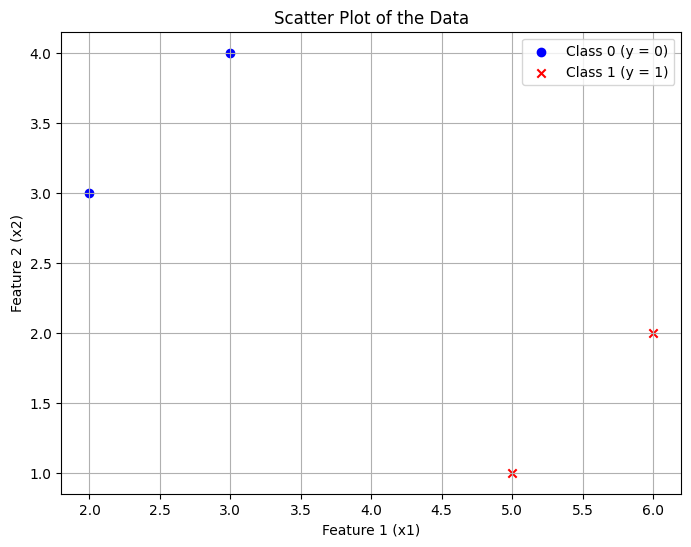

In [12]:
import matplotlib.pyplot as plt

# Define the dataset
x1 = [2.0, 3.0, 5.0, 6.0]  # Feature 1 (x1)
x2 = [3.0, 4.0, 1.0, 2.0]  # Feature 2 (x2)
y = [0, 0, 1, 1]           # Class labels

# Separate the data points by class
x1_class0 = [x1[i] for i in range(len(y)) if y[i] == 0]
x2_class0 = [x2[i] for i in range(len(y)) if y[i] == 0]

x1_class1 = [x1[i] for i in range(len(y)) if y[i] == 1]
x2_class1 = [x2[i] for i in range(len(y)) if y[i] == 1]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x1_class0, x2_class0, color='blue', label='Class 0 (y = 0)', marker='o')
plt.scatter(x1_class1, x2_class1, color='red', label='Class 1 (y = 1)', marker='x')

# Add labels and title
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
